
# Project: TMDb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset used  for investigation is TMDb (The Movie Database).
<br>
It contains 10,866 records for 10,866 movies with 21 features/columns) that describe the movies such as the title, cast, genre, budget, revenue, etc.
<br>

In [35]:
# This cell is used to import the essential libraries used for this project.

import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
We will start investigating the data and see what needs to be cleaned and trimmed.

### General Properties

In [44]:
# We will need to read the csv file and load it into our dataframe variable movies_df
movies_df = pd.read_csv("tmdb-movies.csv")
# Investigate the dataframe
movies_df.head(n=10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
# In order to see the dimensionality of our dataframe we use shape 
# to know the number of records and features we have using shape
movies_df.shape

(10866, 21)

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Get more information about the columns
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Find the number of duplicated rows
movies_df.duplicated().sum()

1

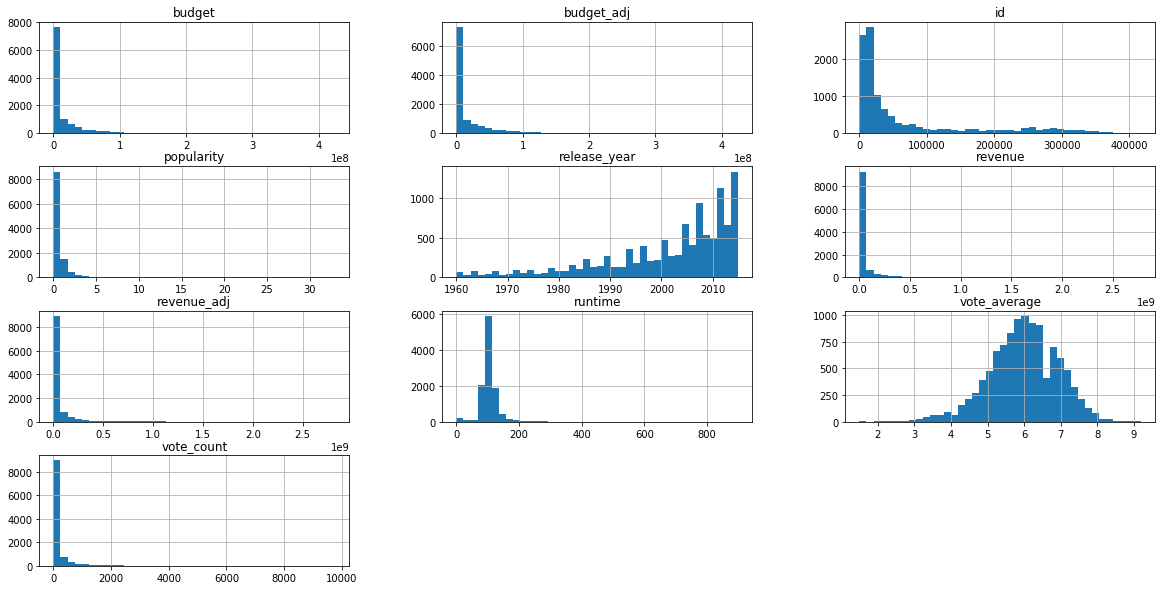

In [7]:
movies_df.hist(figsize=(20,10),bins=40);

### Discovered essential information
1. We can see that the data has a list of items in the cast, genre and production companies columns where the data is seperate by a pipe "|". Which means the data would need to be split before analysis.
2. The average votes are not all done by the same number of voters. Where the count could range from only 10 voters to 9767 voters. Which is something to put in mind during the analysis of ratings.
3. A duplicate record was found
4. Some of the cast are null for 76 records/movies.
5. Some of th genres are null for 23 records/movies. 
5. Some of the the runtime is set to 0, which is somewhat misleading and it would be better to be set to NA.
6. There are some columns that won't be used in the analysis which would be dropped in the cleaning phase.

### Data Cleaning (Dropping unused columns and entries)
 - The following columns will be dropped:
1. imdb_db
2. tagline
3. homepage
4. overview
5. budget (as we would use the budget_adj column instead)
6. revenue (as we would use the revenue_adj column instead)
<br>
 - While the duplicate rows will also be removed.
 - The zeros in the runtime column will be replaced with numpy's "NAN" values to indicate that the runtime is missing for its equivalent movie.
 - Drop records with "NAN" values in the genres column.


In [45]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movies_df.drop(['imdb_id','tagline','homepage','overview','budget','revenue'],1,inplace=True);
movies_df.drop_duplicates(inplace=True)
movies_df['runtime']=movies_df['runtime'].replace(0, np.NAN)
movies_df.dropna(subset=['genres'], inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: The trend of the average votes, popularity and runtime across the years
The point of this section is to discover any trends in the ratings, popularity and runtime as time progresses. Where we will explore factor by factor to be able to reach an overall conclusion.
### Research Question 1.a: The change of the average votes across the years 
Here we attempt to discover how the voters on average vote each year's produced movies.
<br>
And to be able to see that we need to plot a line chart with release year as the x-axis and the average votes per year as the y-axis.

In [4]:
# groupby function with the appropriate aggregation function to be applied on the provided dataframe
def aggregate_groupby(daataframe, groupbyColumnName, agg_func, columns, sort=False):
    grouped_df=daataframe.groupby(groupbyColumnName, sort=sort).agg(agg_func).reset_index()
    grouped_df.columns = columns
    return grouped_df

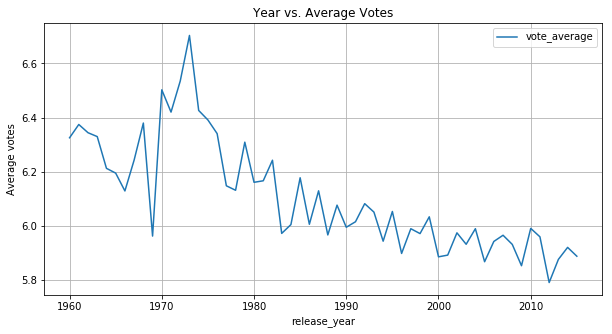

In [5]:
# group by release year and compute the average voting for each year
groupbyColumnName=["release_year"]
agg_func={'vote_average':['mean']}
columns = ['release_year','vote_average']
year_votes=aggregate_groupby(movies_df, groupbyColumnName,agg_func,columns=columns, sort=True)
# year_votes
ax=year_votes.plot(x='release_year', y='vote_average' ,figsize=(10,5), grid=True, title="Year vs. Average Votes");
ax.set_ylabel("Average votes");

### Observations
1. We can see that the average voting decreases across the years except a special spike found around the 1970's with an average rating higher than 6.6.
2. However the voting average differ by the number of voters for each movie thus a more detailed graph is needed.

### Research Question 1.b: The change of the average votes across the years w.r.t the number of voters
Due to the observations found in the previous section, we want to add an extra variable in our plot to be able to come up with a more accurate conclusion.

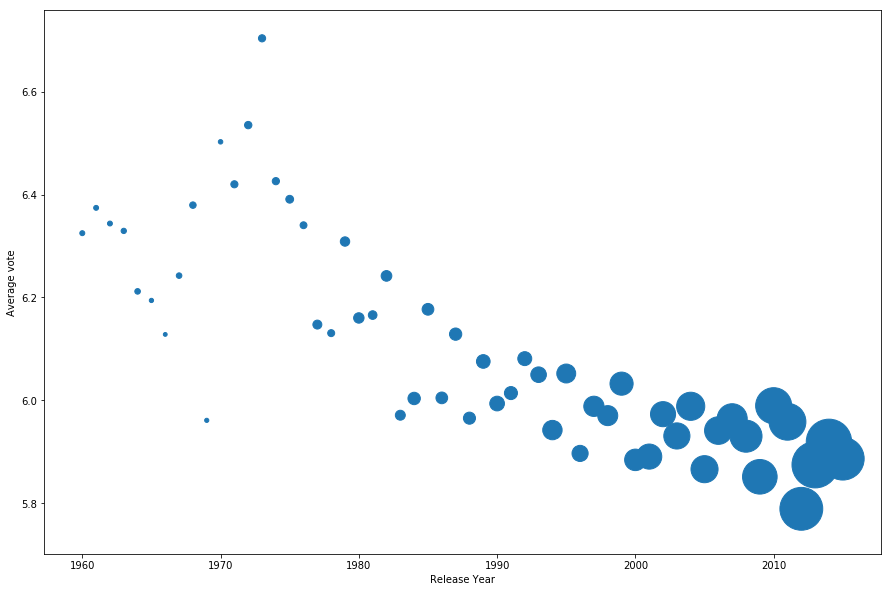

In [6]:
# Calculate the average ratings for each year and the summation of the voters count for each year
agg_func = {'vote_average':['mean'], 'vote_count':['sum']}
groupbyColumnName=['release_year']
columns = ['release_year','vote_average','vote_count']
year_votes_count=aggregate_groupby(movies_df,groupbyColumnName,agg_func,columns)

# Plot a bubble graph with the release year as the x-axis, the ratings as the y-axis and the 
# voters count as the bubbles size
ax = year_votes_count.plot.scatter(x='release_year', y='vote_average', s=year_votes_count['vote_count']*0.01,figsize=(15,10));
ax.set_xlabel("Release Year")
ax.set_ylabel("Average vote");

In [35]:
year_votes.describe()

,release_year,vote_average
count,56.000000,56.000000
mean,1987.500000,6.106338
std,16.309506,0.204230
min,1960.000000,5.789384
25%,1973.750000,5.960597
50%,1987.500000,6.041295
75%,2001.250000,6.242106
max,2015.000000,6.703636


### Observations
1. We can see that as the year progresses, the average voting decreases but within approximately 0.8 range. However the number of voters increase by time which would explain why the average is lower than before
2. We can note that as the count increases the average becomes less proned to be affected by invidivual votes rather than the overall average.

### Research Question 1.c: The change of the average runtime with respect to Release year
Now we attempt to answer the question: How does the average runtime changes across the years?
<br>
And to answer that question we need to plot a line chart with the years in the axis and the average runtime for each year plotted in the y-axis.

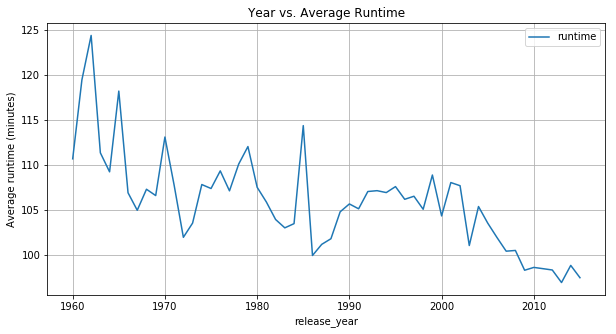

In [7]:
# Calculate the average runtime (in minutes) for each year w.r.t to release year
groupbyColumnName=["release_year"]
agg_func={'runtime':['mean']}
columns = ['release_year','runtime']
year_runtime=aggregate_groupby(movies_df,groupbyColumnName,agg_func,columns,sort=True)
# Plot a line graph with the release year as the x-axis, the runtime (in minutes) as the y-axis 
ax=year_runtime.plot(x='release_year', y='runtime' ,figsize=(10,5), grid=True, title="Year vs. Average Runtime");
ax.set_ylabel("Average runtime (minutes)");

In [38]:
year_runtime.describe()

,release_year,runtime
count,56.000000,56.000000
mean,1987.500000,105.898140
std,16.309506,5.420141
min,1960.000000,96.932412
25%,1973.750000,101.945915
50%,1987.500000,106.016671
75%,2001.250000,107.746542
max,2015.000000,124.343750


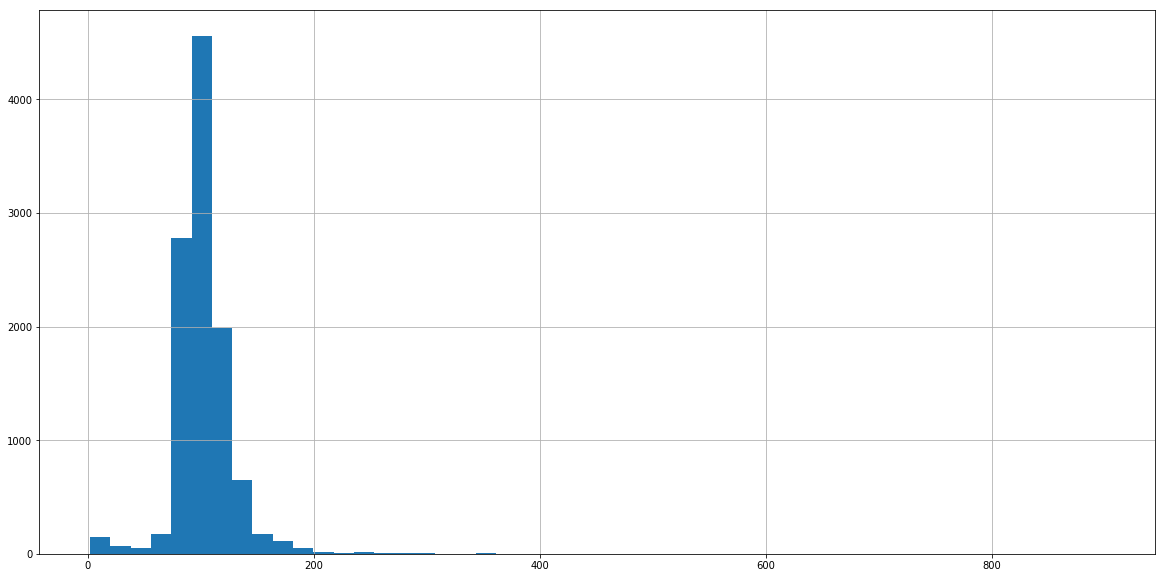

In [39]:
# Looking more into the runtime distribution
movies_df["runtime"].hist(figsize=(20,10),bins=50);

In [40]:
movies_df["runtime"].describe()

count    10812.000000
mean       102.421846
std         30.871363
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [41]:
movie_id = movies_df["runtime"].idxmax()
pd.DataFrame(movies_df.loc[movie_id])

,3894
id,125336
imdb_id,tt2044056
popularity,0.006925
budget,0
revenue,0
original_title,The Story of Film: An Odyssey
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
homepage,http://www.channel4.com/programmes/the-story-o...
director,Mark Cousins
tagline,NaN


In [42]:
movie_id = movies_df["runtime"].idxmin()
pd.DataFrame(movies_df.loc[movie_id])

,4883
id,142563
imdb_id,tt2309977
popularity,0.078472
budget,0
revenue,0
original_title,Fresh Guacamole
cast,NaN
homepage,NaN
director,PES
tagline,NaN


### Observations
1. The first 15 or so years the average runtime is oscillating from around 100 to 125 minutes.
2. However we can still see a trend developing that as the year progresses, the average runtime decreases. 
3. The year 2015 has the maximum average runtime of 124 minutes.
3. The average runtime is around 102 minutes for all the movies.
4. The highest runtime is of 900 minutes (15 hours!) with the title of "The Story of Film: An Odyssey", a documentary movie. 
5. While the lowest runtime is of 2 minutes with the title of "Fresh Guacamole", an Animation movie.

### Research Question 1.d: The change in the popularity of the genres across the years
For this question we want to find the change in the popularity of the genres. 
<br>
And that can be obtained by investigating the following:
1. Plotting the average genre popularity with respect to the release_year and popularity features.
2. The number of times each genre is produced in each year and inspect how does that change as time progresses.
3. Calculate the most produced genres in general (regardless of time).

In [25]:
def aggregate_genre_year(index_list,agg_func,columns):
    data_frame = (movies_df.set_index(index_list)
        ['genres'].str.split('|', expand=True)
        .stack().reset_index(name='genres').drop(['level_2'],1))

    data_frame=aggregate_groupby(daataframe=data_frame,
                                       groupbyColumnName=['release_year','genres'],
                                       agg_func=agg_func, 
                                       columns=columns, 
                                       sort=True)
    
    data_frame=data_frame.pivot(columns='genres', index='release_year', values=columns[-1]).fillna(0)
    return data_frame

#### Average genre popularity w.r.t the release_year and popularity features

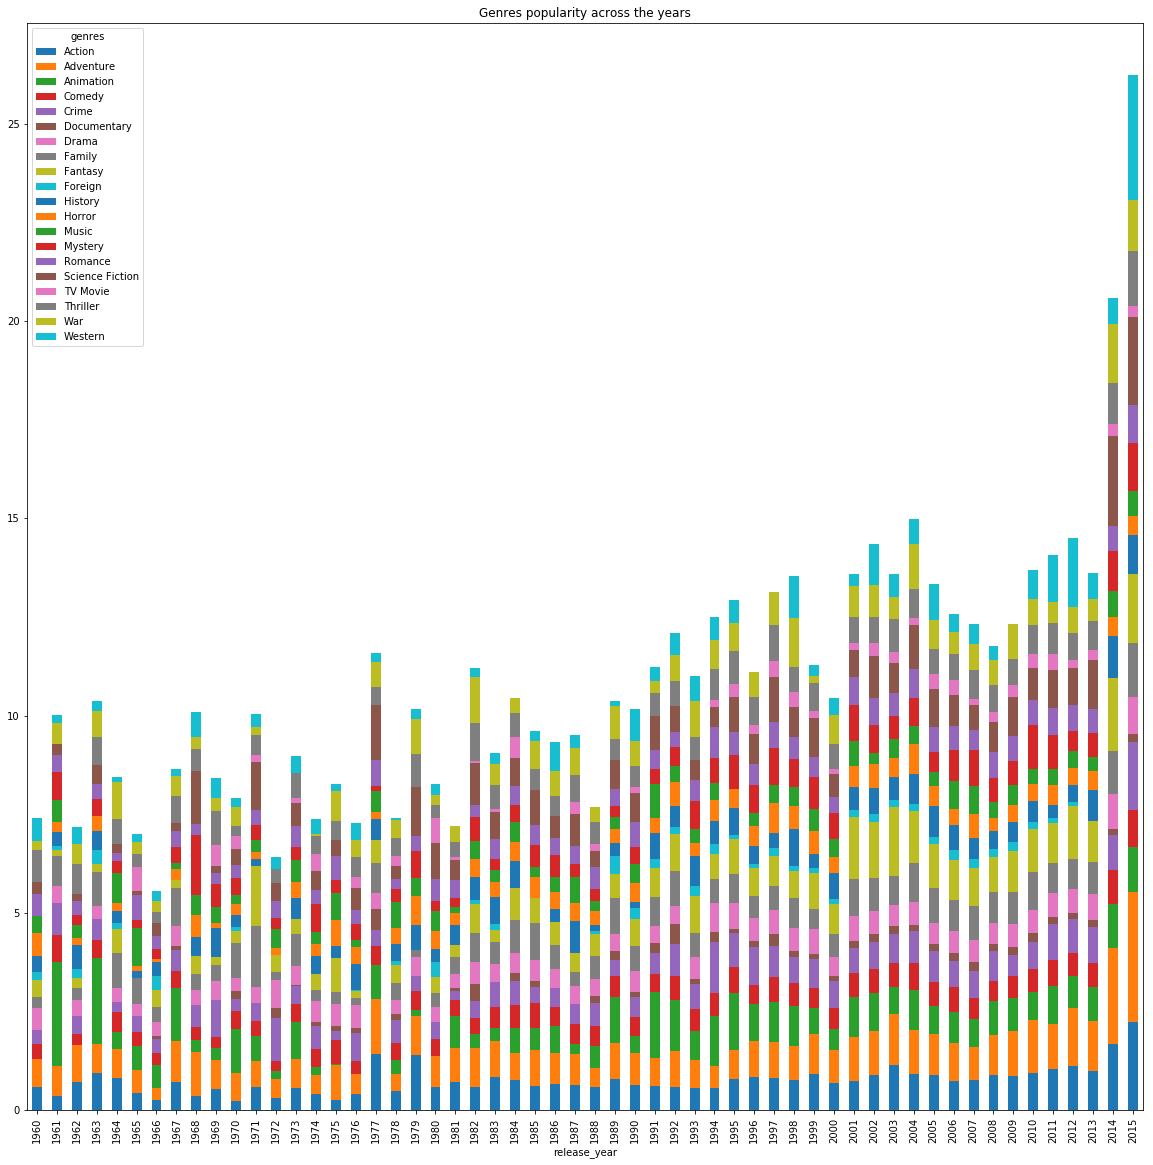

In [26]:
#Each year different genres popularity
year_genre_df=aggregate_genre_year(index_list=['release_year','popularity'],agg_func={'popularity':['mean']},columns=['release_year','genres','popularity'])
year_genre_df.plot(kind="bar",stacked=True,figsize=(20,20), title="Genres popularity across the years");

### Observations
1. We can notice that there isn't a major difference or trend in the genre popularity feature across the years.
2. Except that the year 2015, most of the genres became more popular than before.
3. Thus we can conclude that the popularity attribute associated with each film might not be a good indicator for the genre's popularity. And so we will move on to the next plot.

#### Average count of genres produced each year across time

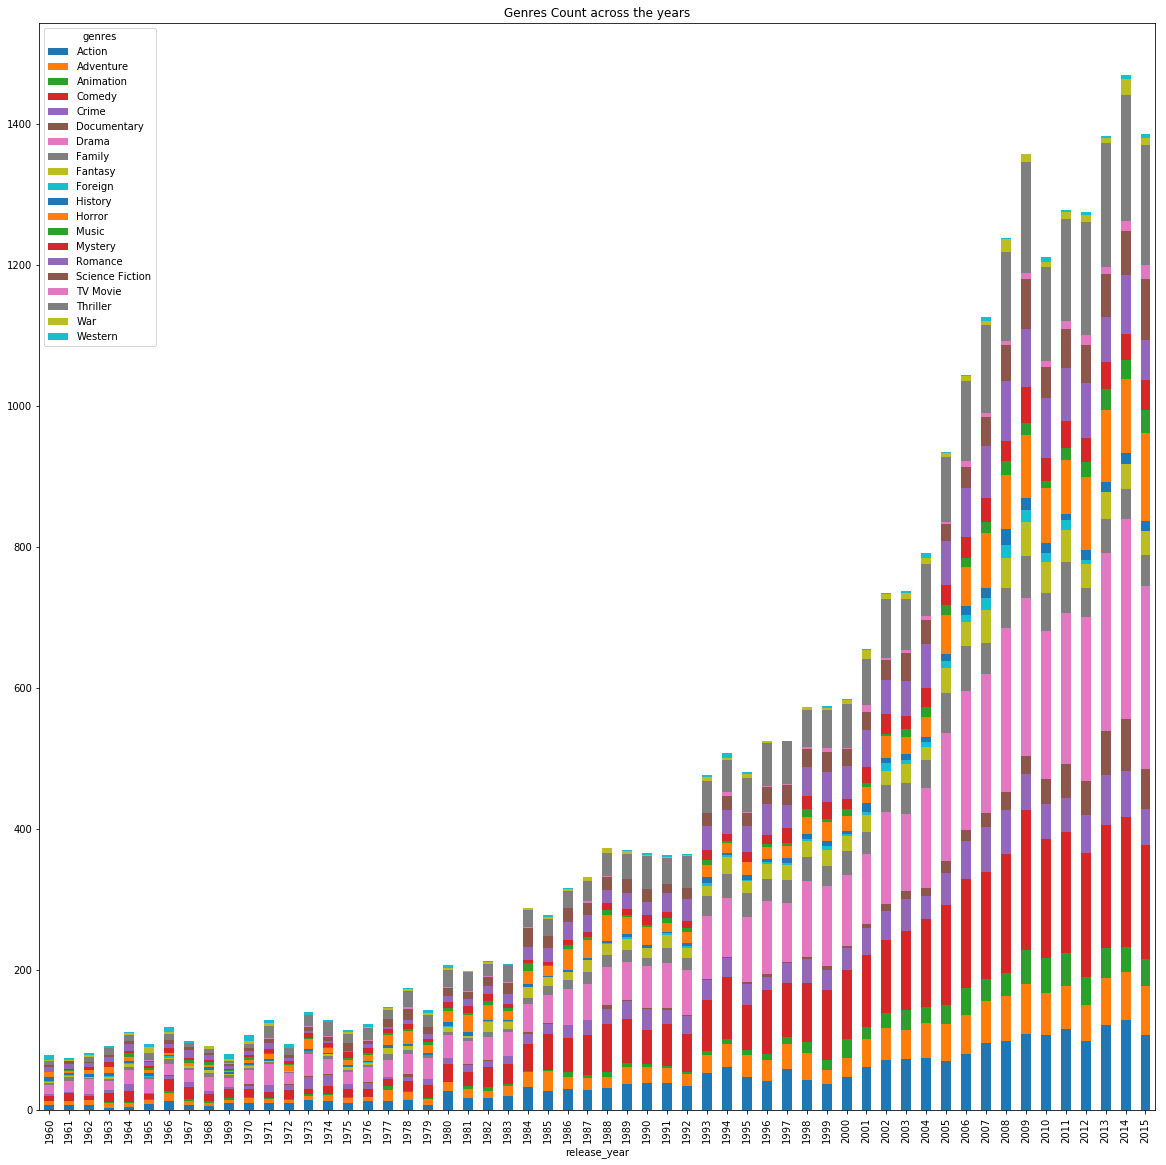

In [27]:
year_genre_df=aggregate_genre_year(index_list=['release_year','id'],agg_func={'id':['count']},columns=['release_year','genres','count'])
year_genre_df.plot(kind="bar",stacked=True,figsize=(20,20), title="Genres Count across the years");

### Observations
1. Now we can actually see a trend forming. Where the count of the genres increase almost exponentially with time. 
2. That means that more movies were produced from year 1993 with more diversity in the genres than before.
3. Where we can notice that from 1960 till approximately 1983, the only most produced genre was Drama movies.
4. However across time, the most dominant genre is definitely Drama movies.

#### Most Produced Genres 

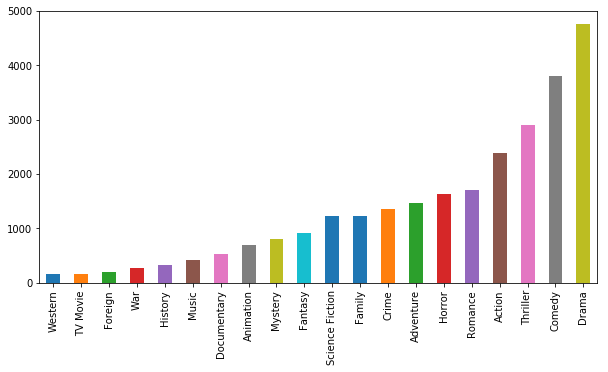

In [28]:
# Popularity of produced genres created along the years (popularity means the how much are they produced along the year)
genre_count=movies_df['genres'].str.split('|',expand=True).stack().reset_index(name='genres').drop(['level_0','level_1'],1)
genre_count= genre_count['genres'].value_counts(ascending = True)
genre_count.plot.bar(figsize=(10,5),title="");

In [24]:
genre_count.describe()

count      20.000000
mean     1347.750000
std      1260.308228
min       165.000000
25%       389.500000
50%      1072.500000
75%      1655.750000
max      4760.000000
Name: genres, dtype: float64

### Observations
1. We can see that the most produced genre across all the movies dataset is Drama with a count of approximately 4760 movies overall.
2. Where this plot is consistent with the previous chart.
3. Thus it is safe to conclude that Drama genre is the most popular genre.
3. While we can see that Western movies are the least produced and the least popular with only a count of 165 movies in a period of 55 years.

### Research Question 2: Profit Analysis
The aim of this section of questions is to calculate the profit for each movie, and come up with some analysis based on the profit. Where the questions to be answered are the following:
1. What is the trend of profits across the years?
2. What are the most/least profitable movies?
3. What are the top 5 movies in terms of profits?
4. Who are the most successful 5 casts w.r.t the most profitable movies?
5. What are the most successful 5 genres w.r.t the most profitable movies?
6.  What are the most successful 5 Production Companies w.r.t to their number of produced movies from the most profitable movies?
7. What are the most successful 5 Production Companies and their total profits w.r.t the most profitable movies?
8. Who are the most successful 5 directors w.r.t to their number of directed movies from the most profitable movies?
9. Who are the most successful 5 directors and their total profits w.r.t the most profitable movies?

In [48]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
if 'profit' not in movies_df.columns:
    movies_df.insert(4,'profit',movies_df['revenue_adj'] - movies_df['budget_adj'])

### Research Question 2.1:  What is the trend of profits across the years?
The point of this question to investigate if there is trend in the movies profits across the years or not.
<br>
1. And this can be obtained by first calculating the profit by subtracting the budget from the revenue for each movie.
2. Then grouping by the year and sum each year's profit

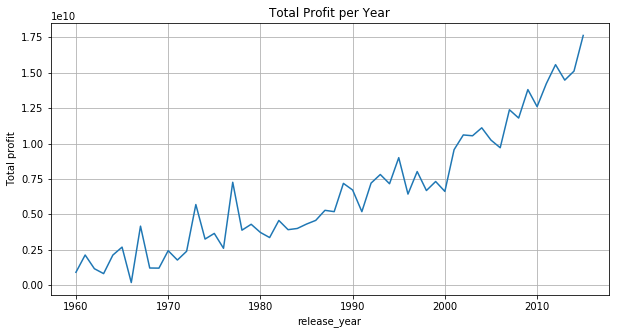

In [50]:
year_profits = movies_df.groupby('release_year')['profit'].sum()
ax=year_profits.plot(x='release_year', y='profit' ,figsize=(10,5), grid=True, title="Total Profit per Year");
ax.set_ylabel("Total profit");

### Observations
1. We can see that the total profit in general increases by time ranging from negative profits (equivlant to values less than 1e+10 in the y-axis with a minimum value of approximately -4e+0). All the way up to positive profits (approximately 2e+09).

### Research Question 2.2:  What are the most/least profitable movies?

In [54]:
max_profit_index= movies_df["profit"].idxmax()
movies_df.loc[max_profit_index]

id                                                                     11
popularity                                                        12.0379
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
profit                                                        2.75014e+09
director                                                     George Lucas
keywords                      android|galaxy|hermit|death star|lightsaber
runtime                                                               121
genres                                   Adventure|Action|Science Fiction
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
release_date                                                      3/20/77
vote_count                                                           4428
vote_average                                                          7.9
release_year                          

In [55]:
max_profit_index= movies_df["profit"].idxmin()
movies_df.loc[max_profit_index]

id                                                                  46528
popularity                                                        0.25054
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
profit                                                       -4.13912e+08
director                                                       Sngmoo Lee
keywords                assassin|small town|revenge|deception|super speed
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                                      12/2/10
vote_count                                                             74
vote_average                                                          6.4
release_year                          

### Observations
1. The most successful movie in terms of profit is Star Wars with a total profit of 2,750,140,000 presumably dollars.
2. While the least successful movie in terms of profit is The Warrior's Way with a total profit of -413,912,431 dolalrs. Or in other words, a loss of 413,912,431 dollars.

### Research Question 2.3:  What are the top 5 movies in terms of profits?
Where the mean profit is obtained and only a the movies with profit higher that the mean are considered successful movies. 
<br>
N.B. This is used for the rest of the questions.

In [59]:
# Most successful Movies
above_aveage_profit = movies_df["profit"].mean()
high_profit_df = movies_df[movies_df['profit'] > above_aveage_profit]
movies_count = high_profit_df.sort_values(by="profit",ascending = False)
movies_count.head()[["original_title","profit"]]

,original_title,profit
1329,Star Wars,2.750137e+09
1386,Avatar,2.586237e+09
5231,Titanic,2.234714e+09
10594,The Exorcist,2.128036e+09
9806,Jaws,1.878643e+09


### Observations
1. We can see the top 5 most profitable movies from the above table.

### Research Question 2.4:  Who are the most successful 5 casts w.r.t the most profitable movies?

In [64]:
# Most successful Cast 
cast_count = high_profit_df["cast"].str.cat(sep = '|')
cast_count = pd.Series(cast_count.split('|'))
cast_count = cast_count.value_counts(ascending = False)
cast_count.head()


Tom Hanks         30
Tom Cruise        30
Brad Pitt         28
Robert De Niro    28
Robin Williams    27
dtype: int64

### Research Question 2.5:  What are the most successful 5 genres w.r.t the most profitable movies?

In [62]:
# Most successful Genres
genre_count = high_profit_df["genres"].str.cat(sep = '|')
genre_count = pd.Series(genre_count.split('|'))
genre_count = genre_count.value_counts(ascending = False)
genre_count.head()

Drama        830
Comedy       792
Action       648
Thriller     603
Adventure    496
dtype: int64

### Research Question 2.6: What are the most successful 5 Production Companies w.r.t to their number of produced movies from the most profitable movies?
Where this is done by grouping by the production companies from the "high profit movies" data frame and count the number of movies these production companies produced a highly profitable movie.

In [241]:
# Most successful Production Companies
production_count = high_profit_df["production_companies"].str.cat(sep = '|')
production_count = pd.Series(production_count.split('|'))
production_count = production_count.value_counts(ascending = False)
production_count.head()

Warner Bros.                              218
Universal Pictures                        218
Paramount Pictures                        185
Twentieth Century Fox Film Corporation    153
Columbia Pictures                         124
dtype: int64

### Research Question 2.7: What are the most successful 5 Production Companies and their total profits w.r.t the most profitable movies?
Where this is also done by grouping by the production companies from the "high profit movies" data frame but summing up the profits of the movies these production companies produced a highly profitable movie.

In [72]:
production_profit= (high_profit_df.set_index(['profit'])
        ['production_companies'].str.split('|', expand=True)
        .stack().reset_index(name='production_companies').drop(['level_1'],1))
production_profit_series=production_profit.groupby(['production_companies'], sort=True)['profit'].sum()
production_profit=pd.DataFrame(production_profit_series)
production_profit.sort_values(by="profit",ascending = False,inplace=True)
production_profit.head()

,profit
production_companies,
Warner Bros.,4.877150e+10
Universal Pictures,4.589884e+10
Paramount Pictures,4.157136e+10
Twentieth Century Fox Film Corporation,3.987645e+10
Walt Disney Pictures,2.639211e+10


### Research Question 2.8: Who are the most successful 5 directors w.r.t to their number of directed movies from the most profitable movies?
This is similar to Question 2.6 but for the directors instead of production companies.

In [74]:
# Most successful Directors 
director_group=high_profit_df.groupby("director",sort=True)["profit"]

In [75]:
# Most successful Directors by Count of profits
director_count = director_group.count().reset_index(name='count').sort_values(by="count",ascending = False)
director_count.head()

,director,count
863,Steven Spielberg,26
153,Clint Eastwood,21
780,Ron Howard,15
890,Tim Burton,14
738,Ridley Scott,14


### Research Question 2.9: Who are the most successful 5 directors and their total profits w.r.t the most profitable movies? 
This is similar to Question 2.7 but for the directors instead of production companies.

In [76]:
# Most successful Directors by sum of profits
director_count = director_group.sum().reset_index(name='sum').sort_values(by="sum",ascending = False)
director_count.head()

,director,sum
863,Steven Spielberg,1.313577e+10
346,James Cameron,6.291789e+09
285,George Lucas,5.835220e+09
687,Peter Jackson,5.624544e+09
130,Chris Columbus,4.389185e+09


<a id='conclusions'></a>
## Conclusions

To summarize up the results I would want to list a couple of questions that helps clarify the final results of the analysis.

Q1) Who is the most successful director for producing many high profitable movies?
    -  Steven Spielberg were he directed 26 highly profitable movies. 
    
Q2) Who is the most successful director for producing the highest amount of profit?
    - Steven Spielberg with a total profit of 13,135,770,000.  
    
Q3) Which production company is the best for producing many high profitable movies?
    - Warner Bros. were they produced 218 highly profitable movies.   
    
Q4) Which production company is the best for producing the highest amount of profit?
    - Warner Bros. with a total profit of 48,771,500,000

Q5) Which genre is the most profitable? 
    - Drama 
    
Q6) Which genre is the most popular?
    - Drama
    
Q7) Who is the most successful actor/actress for casting in many high profitable movies?
    - Tom Hanks, who acted in 30 higly profitable movies.
    
Q8) Which movie had the highest profit?
    - Star Wars
  
Q9) What is the trend in profit across the years?
    - The average profit roughly increases by time.
 
Q10) What is the average runtime for all the movies?
    - Around 102 minutes.

Q11) What is the average rating for the movies?
    - It ranges from 5.8 to 6.4.
   
### Limitations
The dataset had some limitations that where faced when performing data analysis. Where these limitations are the following:
- The average voting for each movie on its own is insufficient to specify whether the movie is highly rated and popular or not. That is because Movie1 could have 20 voters voting 10/10. While Movie2 could have 200 voters with 100 voting 10/10 and the rest are voting 7/10. Which could make the average voting for Movie1 to be higher, and therefore unfair to compare both movies as they are from a different population. Thus it would have been better if all the ratings would have been normalized to the same count and same voters to be able to accurately compare different movie ratings.
- There was a lot of missing values for the production companies feature, which could make the analysis obtained on that variable not 100% reliable.
- The popularity feature was on average 0.646441 while the maximum value was 32.9 which makes this attribute a little bit vague and didn't help much as an indicator of a movie's popularity. Thus other methods had to be taken to compensate this not so good attribute


### Notes
- No references has been used while creating this submission.
- The code is running without any errors however it assumes that the needed libraries (such as NumPy and Pandas would be pre-installed before running this code).